CNN

In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
print(":)")

:)


In [10]:
output_path = "mfcc_data"
os.makedirs(output_path, exist_ok=True)

def extract_mfcc(file_path, n_mfcc=40, max_len=216):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # Normalize length
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc
print(":)")

:)


In [13]:
extract_mfcc("03-01-07-01-02-02-01.wav")
print(":)")

:)


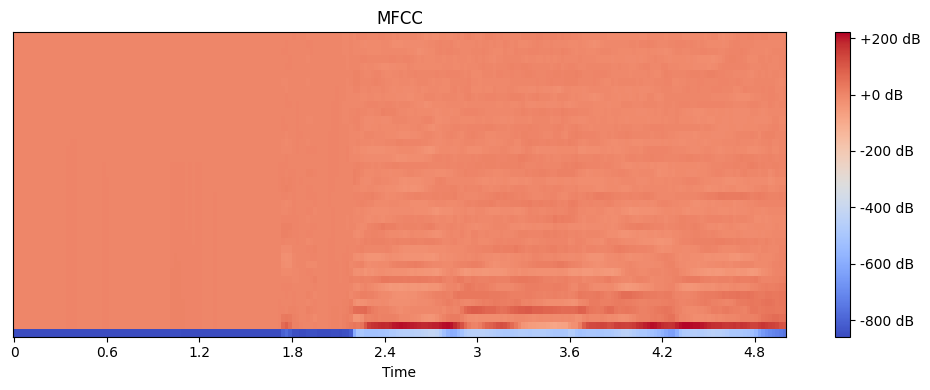

In [14]:
import librosa.display
import matplotlib.pyplot as plt

# Assuming `mfcc` is a 2D NumPy array (shape: [n_mfcc, time_frames])
plt.figure(figsize=(10, 4))
librosa.display.specshow(extract_mfcc("03-01-07-01-02-02-01.wav"), x_axis='time')
plt.colorbar(format="%+2.0f dB")
plt.title("MFCC")
plt.tight_layout()
plt.show()


In [15]:
def save_spectrogram(file_path, save_path):
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(3, 3))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

In [16]:
save_spectrogram("03-01-07-01-02-02-01.wav","spectrogram.png")

In [21]:
import whisper

model = whisper.load_model("base")  # or "small", "medium", "large"

result = model.transcribe("03-01-07-01-02-02-01.wav")
print("Transcription:", result["text"])

/root/miniconda3/envs/emotion_env/lib/python3.10/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  Dogs are sitting by the door.


In [18]:
pip install -U openai-whisper

  Using cached openai-whisper-20240930.tar.gz (800 kB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 299.9 kB/s eta 0:00:00 kB/s eta 0:00:01:02
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803404 sha256=c1afae0832265cd72746baa09a84880d7035533fc9fa031bc84978004e1f3cfa
  Stored in directory: /root/.cache/pip/wheels/dd/4a/1f/d1c4bf3b9133c8168fe617ed979cab7b14fe381d059ffb9d83
Successfully built openai-whisper
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [openai-whisper]━━━ 2/3 [openai-whisper]
Note: you may need to restart the kernel to use updated packages.


In [23]:
import os
import librosa
import numpy as np

# Set paths
dataset_path = "voice_dataset"
output_path = "mfcc_data"
os.makedirs(output_path, exist_ok=True)

def extract_mfcc(file_path, n_mfcc=40, max_len=216):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Pad or truncate to fixed length for uniform input
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc
i=0
# Traverse all actors and wav files
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):
            try:
                file_path = os.path.join(root, file)
                mfcc = extract_mfcc(file_path)
                label = file.split("-")[2]  # Emotion label
                save_name = file.replace(".wav", ".npy")
                print(i+1);
                i+=1;
                np.save(os.path.join(output_path, save_name), mfcc)
            except Exception as e:
                print(f"Skipping {file} due to error: {e}")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [25]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

class MFCCDataset(Dataset):
    def __init__(self, file_paths, labels):
        self.file_paths = file_paths
        self.labels = labels

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        mfcc = np.load(self.file_paths[idx])  # (n_mfcc, time)
        mfcc = torch.tensor(mfcc, dtype=torch.float32).unsqueeze(0)  # (1, n_mfcc, time)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return mfcc, label

# Load file paths & labels
data_dir = "mfcc_data"
file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".npy")]
labels = [int(os.path.basename(f).split("-")[2]) - 1 for f in file_paths]  # 0-indexed emotions

# Train/val split
train_files, val_files, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, stratify=labels, random_state=42)

# DataLoaders
batch_size = 32
train_dataset = MFCCDataset(train_files, train_labels)
val_dataset = MFCCDataset(val_files, val_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


In [28]:
class CNNEmotionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.dropout = nn.Dropout(0.3)

        # Placeholder for dynamically determining flatten size
        self.flattened_size = None

        # Define dummy input to infer size
        self._init_linear_layer()

    def _init_linear_layer(self):
        # Dummy forward to calculate size after conv layers
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, 40, 216)  # typical MFCC shape
            x = self.pool(F.relu(self.conv1(dummy_input)))
            x = self.pool(F.relu(self.conv2(x)))
            self.flattened_size = x.view(1, -1).shape[1]

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        return self.fc2(x)


In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNEmotionModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(30):
    model.train()
    train_loss, correct = 0, 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        correct += (outputs.argmax(1) == targets).sum().item()

    train_acc = correct / len(train_dataset)
    print(f"Epoch {epoch+1}, Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")


Epoch 1, Loss: 8942.6067, Train Acc: 0.1337
Epoch 2, Loss: 2229.1072, Train Acc: 0.2752
Epoch 3, Loss: 1915.7588, Train Acc: 0.3941
Epoch 4, Loss: 1614.9838, Train Acc: 0.5017
Epoch 5, Loss: 1327.6346, Train Acc: 0.5972
Epoch 6, Loss: 1143.4154, Train Acc: 0.6571
Epoch 7, Loss: 825.3029, Train Acc: 0.7500
Epoch 8, Loss: 542.3569, Train Acc: 0.8472
Epoch 9, Loss: 291.0340, Train Acc: 0.9314
Epoch 10, Loss: 147.7643, Train Acc: 0.9714
Epoch 11, Loss: 131.2673, Train Acc: 0.9757
Epoch 12, Loss: 99.2888, Train Acc: 0.9757
Epoch 13, Loss: 57.3548, Train Acc: 0.9887
Epoch 14, Loss: 68.2726, Train Acc: 0.9826
Epoch 15, Loss: 62.9579, Train Acc: 0.9878
Epoch 16, Loss: 34.6086, Train Acc: 0.9931
Epoch 17, Loss: 37.1944, Train Acc: 0.9939
Epoch 18, Loss: 39.1976, Train Acc: 0.9931
Epoch 19, Loss: 20.2960, Train Acc: 0.9965
Epoch 20, Loss: 22.7353, Train Acc: 0.9948
Epoch 21, Loss: 25.7730, Train Acc: 0.9939
Epoch 22, Loss: 45.5116, Train Acc: 0.9870
Epoch 23, Loss: 45.7161, Train Acc: 0.9878
Epo

In [31]:
model.eval()
correct = 0
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        correct += (outputs.argmax(1) == targets).sum().item()

val_acc = correct / len(val_dataset)
print(f"Validation Accuracy: {val_acc:.4f}")


Validation Accuracy: 0.4167


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DeepCNNEmotionModel(nn.Module):
    def __init__(self):
        super(DeepCNNEmotionModel, self).__init__()

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)
        )

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.4)
        )

        # Compute the flattened feature size after 3 poolings
        # Starting from (1, 40, 216) → (128, 5, 27)
        self.fc1 = nn.Linear(128 * 5 * 27, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 8)

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)

        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNEmotionModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(30):
    model.train()
    train_loss, correct = 0, 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        correct += (outputs.argmax(1) == targets).sum().item()

    train_acc = correct / len(train_dataset)
    print(f"Epoch {epoch+1}, Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")


Epoch 1, Loss: 8834.0464, Train Acc: 0.1380
Epoch 2, Loss: 2395.4630, Train Acc: 0.1372
Epoch 3, Loss: 2277.7856, Train Acc: 0.2092
Epoch 4, Loss: 1845.8404, Train Acc: 0.4158
Epoch 5, Loss: 1379.1804, Train Acc: 0.5720
Epoch 6, Loss: 1003.8470, Train Acc: 0.7023
Epoch 7, Loss: 697.6840, Train Acc: 0.8021
Epoch 8, Loss: 416.7323, Train Acc: 0.8845
Epoch 9, Loss: 272.7730, Train Acc: 0.9314
Epoch 10, Loss: 177.8911, Train Acc: 0.9575
Epoch 11, Loss: 138.2193, Train Acc: 0.9722
Epoch 12, Loss: 91.5216, Train Acc: 0.9809
Epoch 13, Loss: 52.7259, Train Acc: 0.9922
Epoch 14, Loss: 42.9813, Train Acc: 0.9939
Epoch 15, Loss: 28.3471, Train Acc: 0.9983
Epoch 16, Loss: 51.8334, Train Acc: 0.9861
Epoch 17, Loss: 65.9471, Train Acc: 0.9922
Epoch 18, Loss: 29.2266, Train Acc: 0.9965
Epoch 19, Loss: 23.2028, Train Acc: 0.9948
Epoch 20, Loss: 26.2233, Train Acc: 0.9939
Epoch 21, Loss: 24.2076, Train Acc: 0.9957
Epoch 22, Loss: 24.7418, Train Acc: 0.9922
Epoch 23, Loss: 28.1271, Train Acc: 0.9939
Epo

In [34]:
model.eval()
correct = 0
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        correct += (outputs.argmax(1) == targets).sum().item()

val_acc = correct / len(val_dataset)
print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.3785


import whisper
import os
from pathlib import Path

# Load Whisper model
model = whisper.load_model("base")

# Define synthetic sentences
emotion_map = {
    "01": "I am speaking in a neutral tone.",
    "02": "I am calm and composed.",
    "03": "I feel very happy today!",
    "04": "I feel so down today.",
    "05": "I am furious right now!",
    "06": "I am really scared.",
    "07": "This is so disgusting!",
    "08": "I can't believe this happened!"
}

# Extract emotion ID from filename
def extract_emotion_id(filename):
    try:
        parts = filename.split("-")
        return parts[2]
    except Exception:
        return None

# Directory setup
root_dir = "voice_dataset"
output_file = "transcripts_with_emotion.txt"
i=0
with open(output_file, "w", encoding="utf-8") as out_f:
    for actor_dir in os.listdir(root_dir):
        actor_path = os.path.join(root_dir, actor_dir)
        if os.path.isdir(actor_path):
            for file in os.listdir(actor_path):
                if file.endswith(".wav") and not file.endswith(".wav:Zone.Identifier"):
                    file_path = os.path.join(actor_path, file)
                    try:
                        result = model.transcribe(file_path)
                        transcript = result["text"].strip()
                        
                        # Use synthetic sentence if transcript is too short
                        if len(transcript.split()) < 3:
                            emotion_id = extract_emotion_id(file)
                            transcript = emotion_map.get(emotion_id, "[UNKNOWN EMOTION]")
                            print(f" → Replaced with synthetic: {transcript}")
                        
                        out_f.write(f"{file_path}\t{transcript}\n")
                        if(i%20==0):
                            print(str((i+1)/1440) + "% done")
                        i+=1
                    except Exception as e:
                        print(f"Error with {file_path}: {e}")


In [20]:
# transcripts = []
# with open("transcripts_with_emotion.txt", "r") as f:
#     for line in f:
#         filename, *text = line.strip().split()
#         transcripts.append({
#             "filename": filename,
#             "text": " ".join(text)
#         })
transcripts = []
with open("transcripts_with_emotion.txt", "r") as f:
    for line in f:
        filepath, *text = line.strip().split()
        transcripts.append({
            "filename": filepath,   # The path to the audio file
            "text": " ".join(text)   # The transcribed text from the audio
        })

# If you want to assign a label (for example, assuming you have a predefined emotion per file)
# You can create a dummy label or load emotion labels if available for each file.
# Let's assume you have labels manually, for now:

# Example of adding labels
emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fearful', 'calm', 'disgust', 'surprised']  # Modify as needed
for idx, entry in enumerate(transcripts):
    entry['label'] = emotion_labels[idx % len(emotion_labels)]  # Dummy label assignment based on index

# Now 'data' will contain the text and its corresponding label:
data = [{"text": entry["text"], "label": entry["label"]} for entry in transcripts]


In [21]:
# emotion_map = {
#     "01": "neutral",
#     "02": "calm",
#     "03": "happy",
#     "04": "sad",
#     "05": "angry",
#     "06": "fearful",
#     "07": "disgust",
#     "08": "surprised"
# }

# for entry in transcripts:
#     emotion_code = entry["filename"].split("-")[2]
#     entry["label"] = emotion_map[emotion_code]


In [22]:
# data = [{"text": entry["text"], "label": entry["label"]} for entry in transcripts]

In [23]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
import re

# Simple tokenizer
def tokenize(text):
    return re.findall(r"\b\w+\b", text.lower())

# Build vocabulary
def build_vocab(data, min_freq=2):
    counter = Counter()
    for item in data:
        counter.update(tokenize(item["text"]))
    vocab = {word: i+2 for i, (word, count) in enumerate(counter.items()) if count >= min_freq}
    vocab["<PAD>"] = 0
    vocab["<UNK>"] = 1
    return vocab

# Convert text to indices
def encode(text, vocab):
    return [vocab.get(word, vocab["<UNK>"]) for word in tokenize(text)]

# Custom dataset
class TextEmotionDataset(Dataset):
    def __init__(self, data, vocab, label_encoder):
        self.vocab = vocab
        self.label_encoder = label_encoder
        self.samples = [(torch.tensor(encode(item["text"], vocab)), label_encoder.transform([item["label"]])[0]) for item in data]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

def collate_fn(batch):
    sequences, labels = zip(*batch)
    padded = pad_sequence(sequences, batch_first=True, padding_value=0)
    return padded, torch.tensor(labels)


In [24]:
import torch.nn as nn

class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(GRUClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        _, h_n = self.gru(embedded)
        output = self.fc(h_n.squeeze(0))
        return output


In [25]:
from sklearn.model_selection import train_test_split

# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(emotion_labels)

# Build vocab and dataset
vocab = build_vocab(data)
dataset = TextEmotionDataset(data, vocab, label_encoder)

train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_loader = DataLoader(train_data, batch_size=32, collate_fn=collate_fn, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, collate_fn=collate_fn)

# Model
model = GRUClassifier(vocab_size=len(vocab), embedding_dim=100, hidden_dim=128, output_dim=len(label_encoder.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")


IndexError: index out of range in self

In [ ]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch_x, batch_y in val_loader:
        outputs = model(batch_x)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.tolist())
        all_labels.extend(batch_y.tolist())

print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))
